In [647]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [648]:
df = pd.read_csv("/Users/emiliodulay/Documents/Programming/Student Success Classification/student-success/expulsion24.txt", delimiter='\t')

''' 
File Structure: https://www.cde.ca.gov/ds/ad/fsed.asp 
'''

' \nFile Structure: https://www.cde.ca.gov/ds/ad/fsed.asp \n'

In [649]:
df.isnull().sum() # No missing values

AcademicYear                                                  0
AggregateLevel                                                0
CountyCode                                                    0
DistrictCode                                               3215
SchoolCode                                                 3215
CountyName                                                    0
DistrictName                                               3215
SchoolName                                                 3215
CharterYN                                                     0
ReportingCategory                                             0
CumulativeEnrollment                                          0
Total Expulsions                                              0
Unduplicated Count of Students Expelled (Total)               0
Unduplicated Count of Students Expelled (Defiance-Only)       0
Expulsion Rate (Total)                                        0
Expulsion Count Violent Incident (Injury

In [650]:
df.dtypes

AcademicYear                                                object
AggregateLevel                                              object
CountyCode                                                   int64
DistrictCode                                               float64
SchoolCode                                                 float64
CountyName                                                  object
DistrictName                                                object
SchoolName                                                  object
CharterYN                                                   object
ReportingCategory                                           object
CumulativeEnrollment                                        object
Total Expulsions                                            object
Unduplicated Count of Students Expelled (Total)             object
Unduplicated Count of Students Expelled (Defiance-Only)     object
Expulsion Rate (Total)                                      ob

In [651]:
df.columns.tolist()

['AcademicYear',
 'AggregateLevel',
 'CountyCode',
 'DistrictCode',
 'SchoolCode',
 'CountyName',
 'DistrictName',
 'SchoolName',
 'CharterYN',
 'ReportingCategory',
 'CumulativeEnrollment',
 'Total Expulsions',
 'Unduplicated Count of Students Expelled (Total)',
 'Unduplicated Count of Students Expelled (Defiance-Only)',
 'Expulsion Rate (Total)',
 'Expulsion Count Violent Incident (Injury)',
 'Expulsion Count Violent Incident (No Injury)',
 'Expulsion Count Weapons Possession',
 'Expulsion Count Illicit Drug-Related',
 'Expulsion Count Defiance-Only',
 'Expulsion Count Other Reasons']

In [652]:
df.rename(columns={
    "ReportingCategory" : "Demographic",
    "CumulativeEnrollment" : "Enrollment Total",
    "Total Expulsions" : "Expulsions Total",
    "Unduplicated Count of Students Expelled (Total)" : "Unduplicated Expulsion Total",
    "Unduplicated Count of Students Expelled (Defiance-Only)" : "Unduplicated Defiance",
    "Expulsion Count Violent Incident (Injury)" : "Violent-Injury",
    "Expulsion Count Violent Incident (No Injury)" : "Violent-No Injury",
    "Expulsion Count Weapons Possession" : "Weapon Possession",
    "Expulsion Count Illicit Drug-Related" : "Drug",
    "Expulsion Count Defiance-Only" : "Defiance",
    "Expulsion Count Other Reasons" : "Other"
}, inplace = True)




In [653]:
# Cast to numeric type
cols = ["Enrollment Total", 
        "Expulsions Total",
        "Unduplicated Expulsion Total",
        "Unduplicated Defiance",
        "Expulsion Rate (Total)", 
        "Violent-Injury",
        "Violent-No Injury",
        "Weapon Possession",
        "Drug",
        "Defiance",
        "Other"]

df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce')


In [654]:
# Convert Charter Status to Numeric. No : 0, Yes : 1
df['CharterYN'] = df['CharterYN'].map({"No " : 0, 
                     "Yes" : 1})
df.head()

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,Demographic,...,Expulsions Total,Unduplicated Expulsion Total,Unduplicated Defiance,Expulsion Rate (Total),Violent-Injury,Violent-No Injury,Weapon Possession,Drug,Defiance,Other
0,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,NaN,GF,...,26.0,25.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,1.0
1,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,NaN,GM,...,58.0,58.0,0.0,0.1,19.0,19.0,14.0,6.0,0.0,0.0
2,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,NaN,GX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,NaN,RA,...,4.0,4.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0
4,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,NaN,RB,...,22.0,21.0,0.0,0.1,14.0,6.0,1.0,0.0,0.0,1.0


In [655]:
df["AggregateLevel"] = df["AggregateLevel"].map({ "C" : "county",
                                                 "D" : "district",
                                                 "S" : "school",
                                                 "T" : "state"

                            })

In [656]:

df["Demographic"] = df['Demographic'].map({"RB" : "African American",
                                            "RI" : "Native American",
                                            "RA" : "Asian",
                                            "RH" : "Latino",
                                            "RF" : "Filipino",
                                            "RD" : "Not Reported", 
                                            "RP" : "Pacific Islander",
                                            "RT" : "Multple",
                                            "RW" : "White",
                                            "GM" : "Male",
                                            "GF" : "Female",
                                            "GX" : "Non-Binary",
                                            "GZ" : "Missing Gender",
                                            "SE" : "English Learners",
                                            "SD" : "Disabilities",
                                            "SS" : "Socioecon Disad",
                                            "SM" : "Migraant",
                                            "SF" : "Foster",
                                            "SH" : "Homeless",
                                            "TA" : "Total"
                                            })



In [657]:
df.head()

,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,Demographic,...,Expulsions Total,Unduplicated Expulsion Total,Unduplicated Defiance,Expulsion Rate (Total),Violent-Injury,Violent-No Injury,Weapon Possession,Drug,Defiance,Other
0,2023-24,county,1,NaN,NaN,Alameda,NaN,NaN,NaN,Female,...,26.0,25.0,0.0,0.0,18.0,7.0,0.0,0.0,0.0,1.0
1,2023-24,county,1,NaN,NaN,Alameda,NaN,NaN,NaN,Male,...,58.0,58.0,0.0,0.1,19.0,19.0,14.0,6.0,0.0,0.0
2,2023-24,county,1,NaN,NaN,Alameda,NaN,NaN,NaN,Non-Binary,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-24,county,1,NaN,NaN,Alameda,NaN,NaN,NaN,Asian,...,4.0,4.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0
4,2023-24,county,1,NaN,NaN,Alameda,NaN,NaN,NaN,African American,...,22.0,21.0,0.0,0.1,14.0,6.0,1.0,0.0,0.0,1.0


# Exploratory Data Analysis

In [658]:
import matplotlib.cm as cm

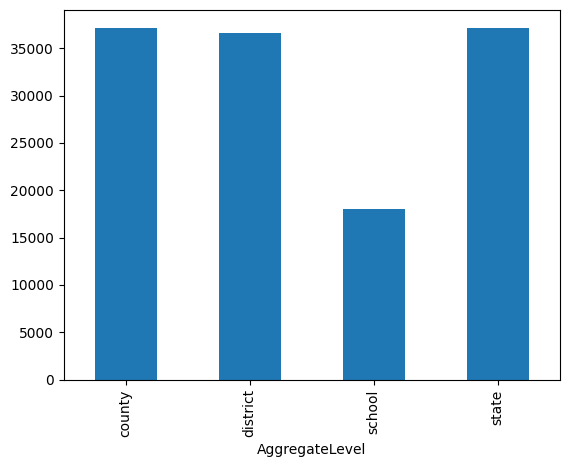

In [659]:
agg_level = df.groupby("AggregateLevel")["Expulsions Total"].sum()

agg_level.plot(kind = "bar")
plt.show()

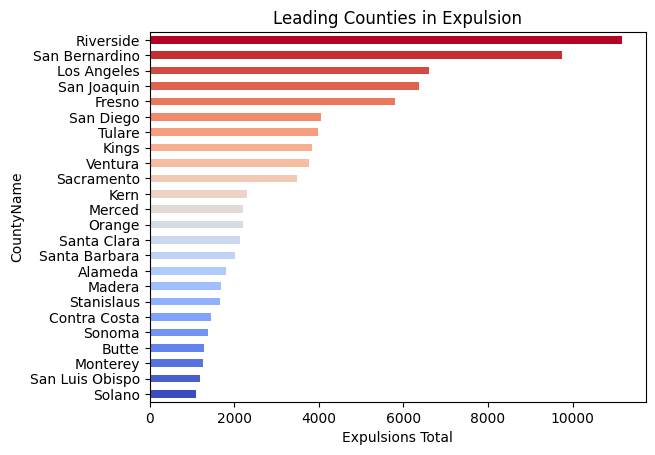

In [660]:
df_filter = df[df["CountyName"] != "State"] # filter the "State" county from the viz
county_level = df_filter.groupby("CountyName")["Expulsions Total"].sum()
county_level_filtered = county_level[county_level > 1000].sort_values()

num_bars = len(county_level_filtered)
colors = cm.coolwarm(np.linspace(0,1, num_bars))


county_level_filtered.plot(kind="barh", color = colors)
plt.title("Leading Counties in Expulsion")
plt.ylabel("CountyName")
plt.xlabel("Expulsions Total")
plt.show()

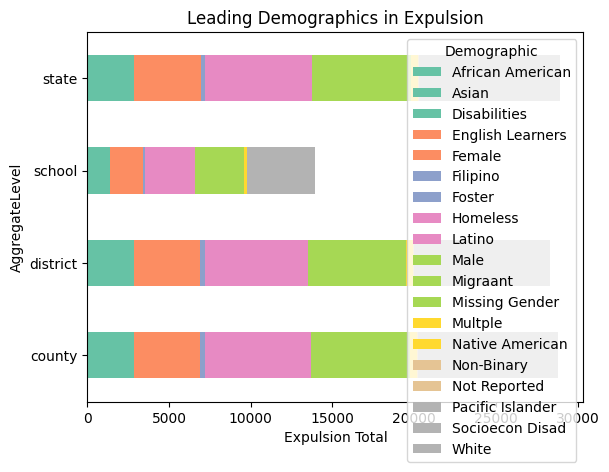

In [661]:
df_filter = df[df["Demographic"] != "Total"]
dem_pivot = df_filter.groupby(["AggregateLevel", "Demographic"])["Expulsions Total"].sum().unstack()


cmap = sns.color_palette("Set2", as_cmap = True)
dem_pivot.plot(kind = "barh", stacked = True,  colormap = cmap)
plt.xlabel("Expulsion Total")
plt.title("Leading Demographics in Expulsion")
plt.show()

Text(0.5, 1.0, 'Expulsion by Aggregate Level and Demographic')

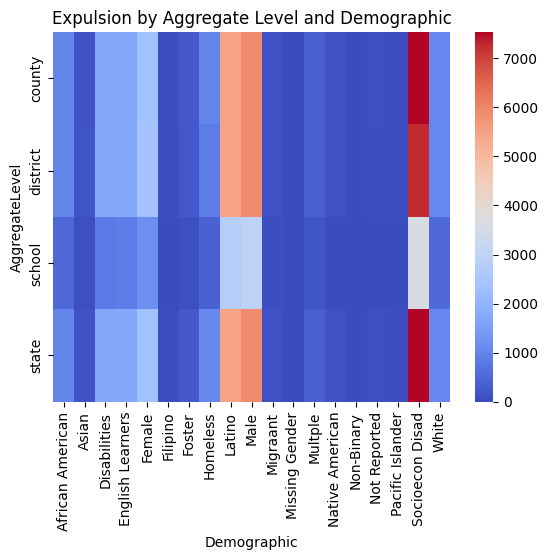

In [662]:
sns.heatmap(dem_pivot, fmt = "g", cmap= "coolwarm")
plt.title("Expulsion by Aggregate Level and Demographic")

Text(0.5, 1.0, 'Demographic by Value Count, sorted by Aggregate Level')

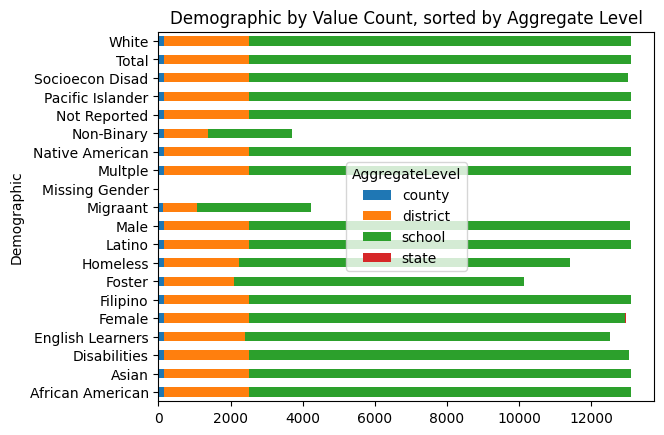

In [663]:
dem_by_agg = df.groupby(["AggregateLevel"])["Demographic"].value_counts().reset_index()
# Different agg levels: state, county, district, school
dem_by_agg[dem_by_agg["AggregateLevel"] == "school"]

dem_by_agg_pivot = dem_by_agg.pivot(index="Demographic", columns="AggregateLevel", values="count").fillna(0)
dem_by_agg_pivot.plot(kind= "barh", stacked = True)

plt.title("Demographic by Value Count, sorted by Aggregate Level")

# ML Adjustment (Pivot Aggregate Level)

In [664]:
df = df.join(pd.get_dummies(df["AggregateLevel"], prefix = "is_", dtype = int)).drop(columns=["AggregateLevel", "AcademicYear"])

In [665]:
df.head()

,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,CharterYN,Demographic,Enrollment Total,Expulsions Total,...,Violent-Injury,Violent-No Injury,Weapon Possession,Drug,Defiance,Other,is__county,is__district,is__school,is__state
0,1,NaN,NaN,Alameda,NaN,NaN,NaN,Female,106114.0,26.0,...,18.0,7.0,0.0,0.0,0.0,1.0,1,0,0,0
1,1,NaN,NaN,Alameda,NaN,NaN,NaN,Male,113331.0,58.0,...,19.0,19.0,14.0,6.0,0.0,0.0,1,0,0,0
2,1,NaN,NaN,Alameda,NaN,NaN,NaN,Non-Binary,323.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,1,NaN,NaN,Alameda,NaN,NaN,NaN,Asian,62208.0,4.0,...,3.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0
4,1,NaN,NaN,Alameda,NaN,NaN,NaN,African American,18433.0,22.0,...,14.0,6.0,1.0,0.0,0.0,1.0,1,0,0,0


In [666]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score